In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  # Give nice white background with grid
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-29,571.332625,572.042580,567.071550,571.602530,1083800,571.602530
2014-09-02,571.852545,577.832629,571.192593,577.332662,1578400,577.332662
2014-09-03,580.002643,582.992655,575.002602,577.942611,1215100,577.942611
2014-09-04,580.002643,586.002680,579.222611,581.982621,1458200,581.982621
2014-09-05,583.982613,586.552650,581.952632,586.082672,1632400,586.082672


In [6]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,117.714502,118.761155,116.488486,117.604382,5.490379e+07,116.516133
std,10.544645,10.408394,10.579765,10.483058,2.348760e+07,10.780185
min,94.870003,97.720001,92.000000,96.260002,1.447960e+07,94.642124
25%,109.295002,110.774998,108.199997,109.290001,3.963830e+07,107.825248
50%,118.809998,119.989998,117.830002,118.930000,4.894840e+07,117.901617
75%,127.165001,127.934998,125.985000,126.915001,6.339415e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,131.942761


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2014-08-29 to 2015-08-27
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


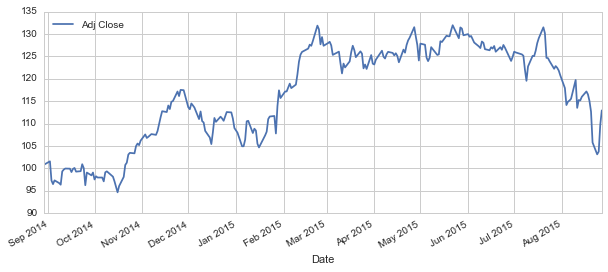

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

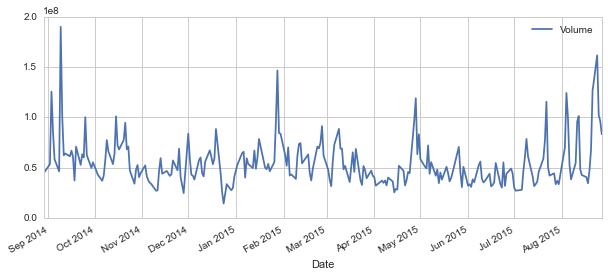

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

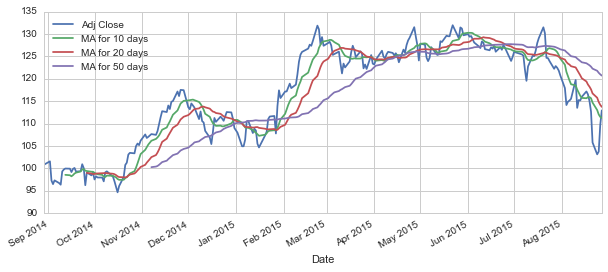

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

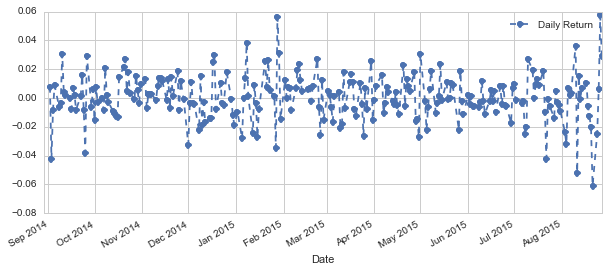

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


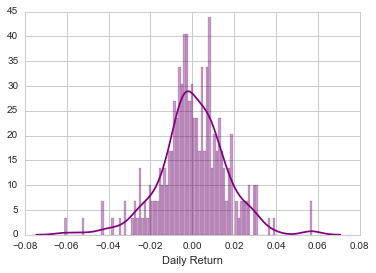

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color = 'purple')

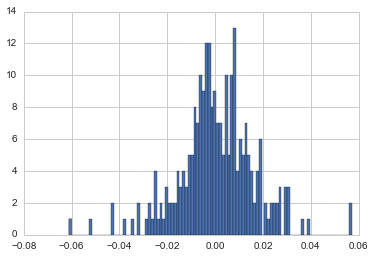

In [21]:
AAPL['Daily Return'].hist(bins=100)

In [22]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [23]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-29,100.777244,339.040009,571.602530,44.245039
2014-09-02,101.563801,342.380005,577.332662,43.913907
2014-09-03,97.277080,339.000000,577.942611,43.787297
2014-09-04,96.470863,345.950012,581.982621,44.079471
2014-09-05,97.306575,346.380005,586.082672,44.712519


In [24]:
tech_rets = closing_df.pct_change()

In [26]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-29,NaN,NaN,NaN,NaN
2014-09-02,0.007805,0.009851,0.010025,-0.007484
2014-09-03,-0.042207,-0.009872,0.001056,-0.002883
2014-09-04,-0.008288,0.020502,0.006990,0.006673
2014-09-05,0.008663,0.001243,0.007045,0.014362


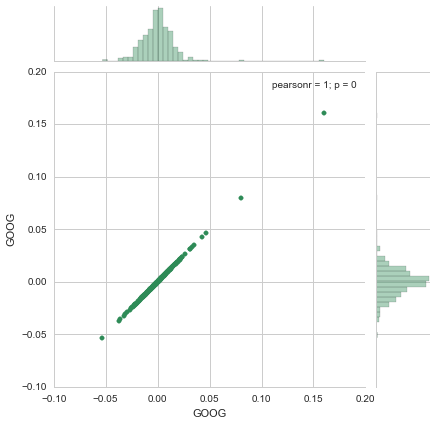

In [28]:
sns.jointplot('GOOG','GOOG',tech_rets,
              kind='scatter',color = 'seagreen')

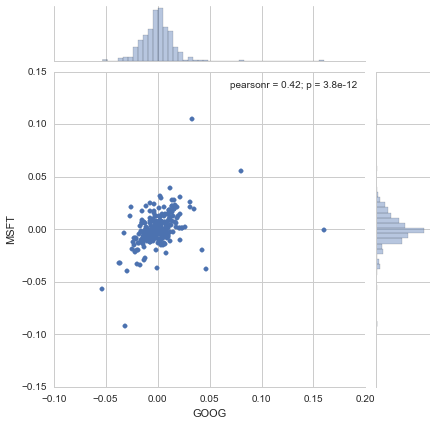

In [29]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

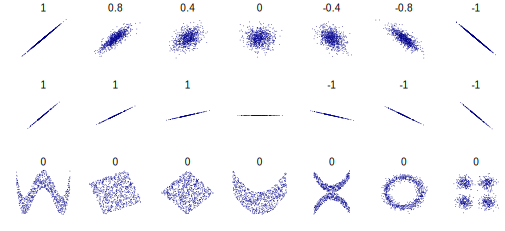

In [31]:
# Pearson Correlation Value
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

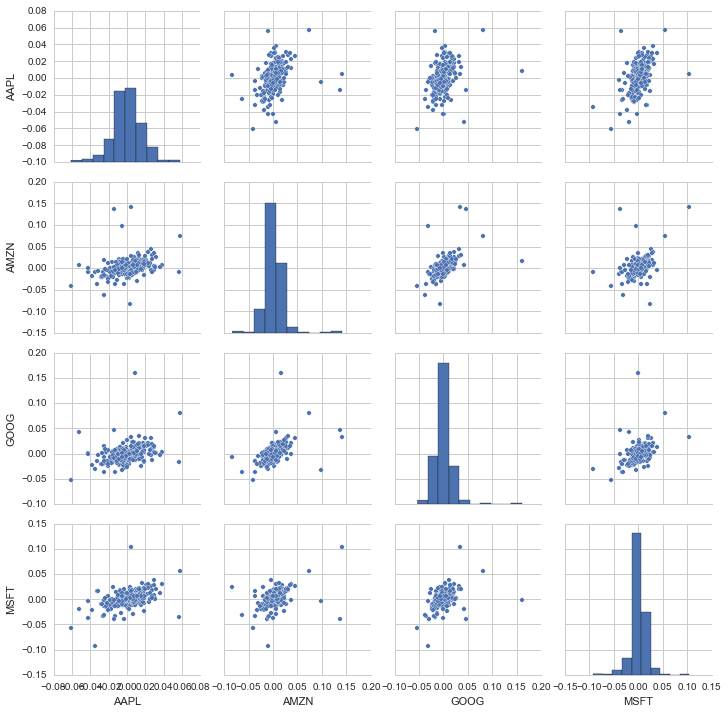

In [32]:
sns.pairplot(tech_rets.dropna())

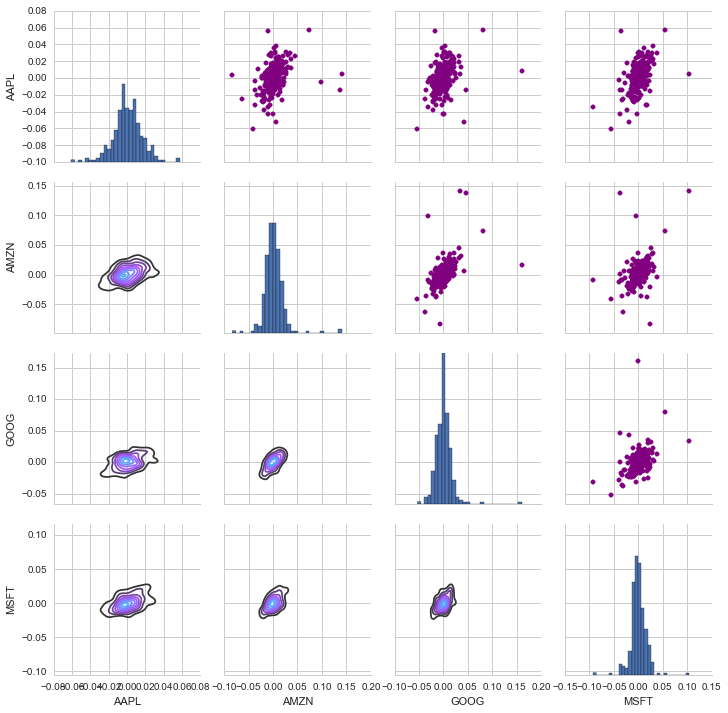

In [33]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')   #upper triangle
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')    #lower triangle
returns_fig.map_diag(plt.hist,bins=30)              #the diagonal row

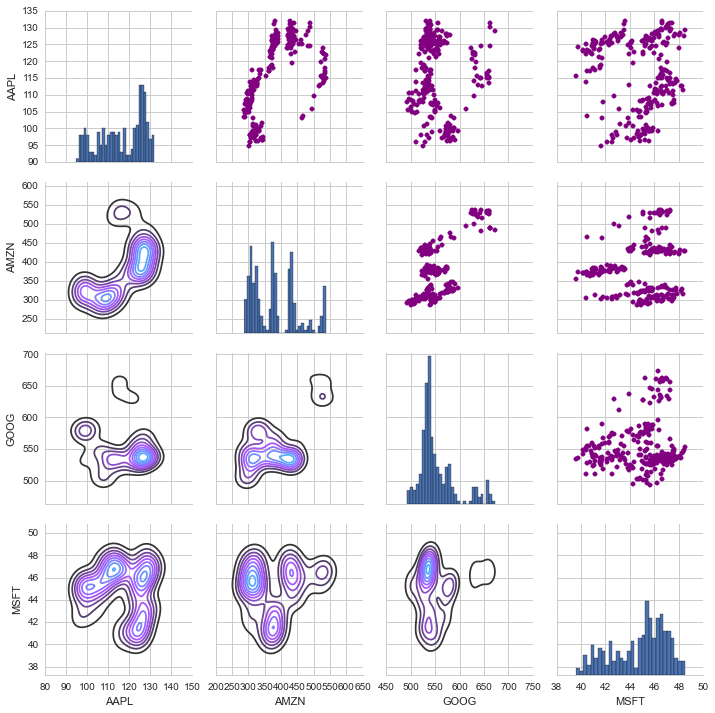

In [34]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')   #upper triangle
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')    #lower triangle
returns_fig.map_diag(plt.hist,bins=30)              #the diagonal row

/Users/jspang/anaconda/lib/python3.4/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/jspang/anaconda/lib/python3.4/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


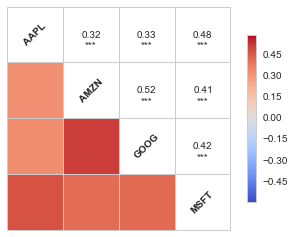

In [35]:
sns.corrplot(tech_rets.dropna(),annot=True)

/Users/jspang/anaconda/lib/python3.4/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/jspang/anaconda/lib/python3.4/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


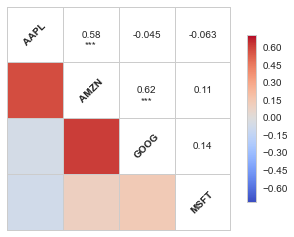

In [36]:
sns.corrplot(closing_df,annot=True)

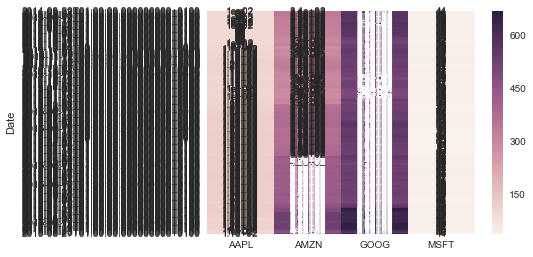

In [37]:
sns.heatmap(closing_df,annot=True)

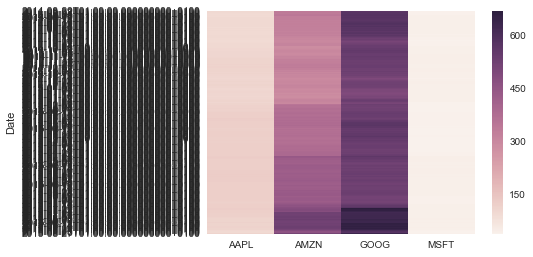

In [38]:
sns.heatmap(closing_df,annot=False)

In [39]:
rets = tech_rets.dropna()

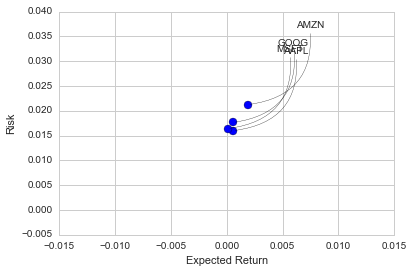

In [46]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Documentation for matplotlib annotaion: 
#  
for label, x , y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (75,75),
        textcoords = 'offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle = '-',
                          connectionstyle = 'arc3,rad=-0.5'))

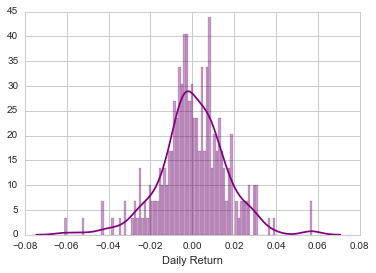

In [48]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [50]:
rets['AAPL'].quantile(0.05)

-0.025298214980969558

In [51]:
#Monte Carlo Method

In [59]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [60]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [55]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-29,571.332625,572.042580,567.071550,571.602530,1083800,571.602530
2014-09-02,571.852545,577.832629,571.192593,577.332662,1578400,577.332662
2014-09-03,580.002643,582.992655,575.002602,577.942611,1215100,577.942611
2014-09-04,580.002643,586.002680,579.222611,581.982621,1458200,581.982621
2014-09-05,583.982613,586.552650,581.952632,586.082672,1632400,586.082672


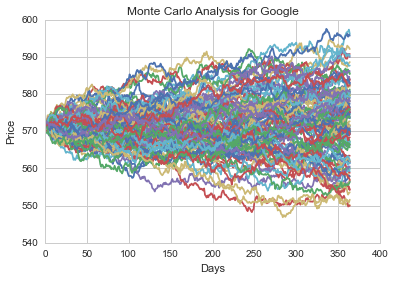

In [61]:
start_price = 571.33

for run in range(100):   # do simulation for 100 times
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [62]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

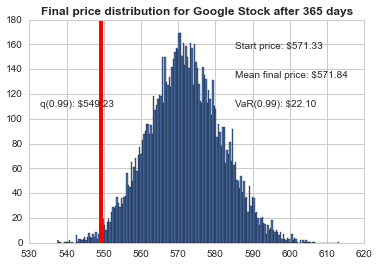

In [63]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

# Mean Ending Price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4,color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')